# Portfolio Project: Online Retail Exploratory Data Analysis with Python

## Overview

In this project, you will step into the shoes of an entry-level data analyst at an online retail company, helping interpret real-world data to help make a key business decision.

## Case Study
In this project, you will be working with transactional data from an online retail store. The dataset contains information about customer purchases, including product details, quantities, prices, and timestamps. Your task is to explore and analyze this dataset to gain insights into the store's sales trends, customer behavior, and popular products. 

By conducting exploratory data analysis, you will identify patterns, outliers, and correlations in the data, allowing you to make data-driven decisions and recommendations to optimize the store's operations and improve customer satisfaction. Through visualizations and statistical analysis, you will uncover key trends, such as the busiest sales months, best-selling products, and the store's most valuable customers. Ultimately, this project aims to provide actionable insights that can drive strategic business decisions and enhance the store's overall performance in the competitive online retail market.

## Prerequisites

Before starting this project, you should have some basic knowledge of Python programming and Pandas. In addition, you may want to use the following packages in your Python environment:

- pandas
- numpy
- seaborn
- matplotlib

These packages should already be installed in Coursera's Jupyter Notebook environment, however if you'd like to install additional packages that are not included in this environment or are working off platform you can install additional packages using `!pip install packagename` within a notebook cell such as:

- `!pip install pandas`
- `!pip install matplotlib`

## Project Objectives
1. Describe data to answer key questions to uncover insights
2. Gain valuable insights that will help improve online retail performance
3. Provide analytic insights and data-driven recommendations

## Dataset

The dataset you will be working with is the "Online Retail" dataset. It contains transactional data of an online retail store from 2010 to 2011. The dataset is available as a .xlsx file named `Online Retail.xlsx`. This data file is already included in the Coursera Jupyter Notebook environment, however if you are working off-platform it can also be downloaded [here](https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx).

The dataset contains the following columns:

- InvoiceNo: Invoice number of the transaction
- StockCode: Unique code of the product
- Description: Description of the product
- Quantity: Quantity of the product in the transaction
- InvoiceDate: Date and time of the transaction
- UnitPrice: Unit price of the product
- CustomerID: Unique identifier of the customer
- Country: Country where the transaction occurred

## Tasks

You may explore this dataset in any way you would like - however if you'd like some help getting started, here are a few ideas:

1. Load the dataset into a Pandas DataFrame and display the first few rows to get an overview of the data.
2. Perform data cleaning by handling missing values, if any, and removing any redundant or unnecessary columns.
3. Explore the basic statistics of the dataset, including measures of central tendency and dispersion.
4. Perform data visualization to gain insights into the dataset. Generate appropriate plots, such as histograms, scatter plots, or bar plots, to visualize different aspects of the data.
5. Analyze the sales trends over time. Identify the busiest months and days of the week in terms of sales.
6. Explore the top-selling products and countries based on the quantity sold.
7. Identify any outliers or anomalies in the dataset and discuss their potential impact on the analysis.
8. Draw conclusions and summarize your findings from the exploratory data analysis.

## Task 1: Load the Data

In [63]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline     
sns.set(color_codes=True)

In [20]:
df = pd.read_excel("Online Retail.xlsx")

In [21]:
print(df.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


In [27]:
print("Number of missing values, column:")
print(df.isnull().sum())

print("---------------------------------------------------------------------------------------------")

print("Number of unique values, row:")
print(df.nunique())

Number of missing values, column:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64
---------------------------------------------------------------------------------------------
Number of unique values, row:
InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64


In [34]:
df['CustomerID'].fillna("N/A", inplace=True) # Replaces null CustomerIDs with "N/A"
df = df[df['Description'].notna()] # Filters rows without a null description

In [58]:
df = df.assign(SaleAmount=df['Quantity'] * df['UnitPrice']) #Calculates gross sale amount of a transaction
df

# Not sure why GrossPrice and SaleAmount are showing up together as well as Grosfnefs

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Gross,GrossPrice,SaleAmount,Grosfnefs
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,15.30,15.30,15.30
1,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,20.34,20.34,20.34
2,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,22.00,22.00,22.00
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,20.34,20.34,20.34
4,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,20.34,20.34,20.34
...,...,...,...,...,...,...,...,...,...,...
541904,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20,10.20,10.20,10.20
541905,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60,12.60,12.60,12.60
541906,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60,16.60,16.60,16.60
541907,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60,16.60,16.60,16.60


In [59]:
df.describe()

,Quantity,UnitPrice,Gross,GrossPrice,SaleAmount,Grosfnefs
count,540455.000000,540455.000000,540455.000000,540455.000000,540455.000000,540455.000000
mean,9.603129,4.623519,18.036188,18.036188,18.036188,18.036188
std,218.007598,96.889628,379.318894,379.318894,379.318894,379.318894
min,-80995.000000,-11062.060000,-168469.600000,-168469.600000,-168469.600000,-168469.600000
25%,1.000000,1.250000,3.480000,3.480000,3.480000,3.480000
50%,3.000000,2.080000,9.840000,9.840000,9.840000,9.840000
75%,10.000000,4.130000,17.400000,17.400000,17.400000,17.400000
max,80995.000000,38970.000000,168469.600000,168469.600000,168469.600000,168469.600000


In [60]:
df['Month2Year'] = df['InvoiceDate'].dt.to_period('M').copy()
df

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Gross,GrossPrice,SaleAmount,Grosfnefs,Month2Year
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,15.30,15.30,15.30,2010-12
1,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,20.34,20.34,20.34,2010-12
2,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,22.00,22.00,22.00,2010-12
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,20.34,20.34,20.34,2010-12
4,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,20.34,20.34,20.34,2010-12
...,...,...,...,...,...,...,...,...,...,...,...
541904,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20,10.20,10.20,10.20,2011-12
541905,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60,12.60,12.60,12.60,2011-12
541906,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60,16.60,16.60,16.60,2011-12
541907,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60,16.60,16.60,16.60,2011-12


             SalesAmount  UnitPrice  Quantity
SalesAmount     1.000000   0.997949  0.606557
UnitPrice       0.997949   1.000000  0.554416
Quantity        0.606557   0.554416  1.000000


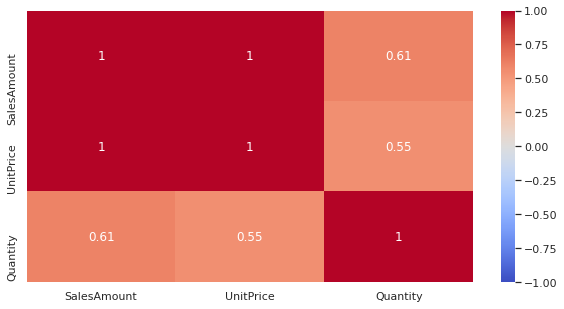

In [82]:
# Sample DataFrame with more diversified data
data = {'SalesAmount': [1, 5, 10], 'UnitPrice': [4, 6, 8], 'Quantity': [7, 3, 12]}
df = pd.DataFrame(data)
plt.figure(figsize=(10, 5))
corr = df.corr() # Calculates the correlation matrix for specific numeric columns
cmap = 'coolwarm'
sns.heatmap(corr, cmap=cmap, annot=True, vmin=-1, vmax=1) # Creates heatmap 
print(corr) # Displays the correlation matrix (optional)

# Show the heatmap
plt.show()


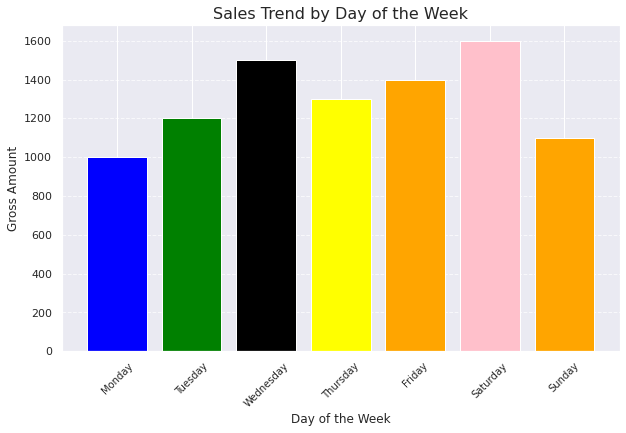

In [83]:
data = {'Day of the Week': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
        'Gross Amount': [1000, 1200, 1500, 1300, 1400, 1600, 1100]}
daily_sales = pd.DataFrame(data)
plt.figure(figsize=(10, 6))
colors = ['blue', 'green', 'black', 'yellow', 'orange', 'pink', 'orange']
plt.bar(daily_sales['Day of the Week'], daily_sales['Gross Amount'], color=colors)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Gross Amount', fontsize=12)
plt.title('Sales Trend by Day of the Week', fontsize=16)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
